In [38]:
import h5py
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import os 
import string
from decimal import *
import yt
import glob
from yt.analysis_modules.particle_trajectories.api import ParticleTrajectories
from mpl_toolkits.mplot3d import Axes3D

In [40]:
f=h5py.File('relax_hdf5_part_0231','r')
len(f['tracer particles'][:])

963

In [63]:
f_parts = glob.glob("relax_hdf5_part_00[0-1][0-9]")
f_parts.sort()


fields = ["particle_dens","particle_temp","particle_pres",'particle_position_y',
          'particle_position_z',"particle_velocity_x", "particle_velocity_y", "particle_velocity_z"]
indices = np.arange(963)

pfs = []
for i in range (0,19):
    pfs.append(yt.load(f_parts[i]))
#print(pfs)
ts = yt.DatasetSeries(pfs)

trajs = ParticleTrajectories(ts, indices, fields=fields)

#trajs = ts.particle_trajectories(indices, fields=fields, suppress_logging=True)
#print (trajs["particle_position_x"])

#trajs.write_out_h5("relax_trajectories.h5")

yt : [WARNING  ] 2020-06-08 14:01:16,441 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2020-06-08 14:01:16,463 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-06-08 14:01:16,463 Parameters: domain_dimensions         = [2 2 0]
yt : [INFO     ] 2020-06-08 14:01:16,464 Parameters: domain_left_edge          = [ 0.0000e+00 -6.5536e+09  0.0000e+00]
yt : [INFO     ] 2020-06-08 14:01:16,467 Parameters: domain_right_edge         = [1.31072000e+10 6.55360000e+09 6.28318531e+00]
yt : [INFO     ] 2020-06-08 14:01:16,469 Parameters: cosmological_simulation   = 0.0
yt : [WARNING  ] 2020-06-08 14:01:16,513 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2020-06-08 14:01:16,532 Parameters: current_time              = 20.014448374734233
yt : [INFO     ] 2020-06-08 14:01:16,532 Parameters: domain_dimensions         = [2 2 0]
yt : [INFO     ] 2020-06-08 14:01:16,533 Parameters: domain_left_edge          = [ 0.0000e+00 -6.5536e+09  0.0000e+00]
yt : [INFO  

yt : [INFO     ] 2020-06-08 14:01:17,488 Parameters: domain_right_edge         = [1.31072000e+10 6.55360000e+09 6.28318531e+00]
yt : [INFO     ] 2020-06-08 14:01:17,490 Parameters: cosmological_simulation   = 0.0
yt : [WARNING  ] 2020-06-08 14:01:17,543 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2020-06-08 14:01:17,562 Parameters: current_time              = 280.0213788980933
yt : [INFO     ] 2020-06-08 14:01:17,562 Parameters: domain_dimensions         = [2 2 0]
yt : [INFO     ] 2020-06-08 14:01:17,563 Parameters: domain_left_edge          = [ 0.0000e+00 -6.5536e+09  0.0000e+00]
yt : [INFO     ] 2020-06-08 14:01:17,564 Parameters: domain_right_edge         = [1.31072000e+10 6.55360000e+09 6.28318531e+00]
yt : [INFO     ] 2020-06-08 14:01:17,568 Parameters: cosmological_simulation   = 0.0
yt : [WARNING  ] 2020-06-08 14:01:17,609 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2020-06-08 14:01:17,623 Parameters: current_time              = 300.01493611

Generating [particle_dens, particle_temp, particle_pres, particle_velocity_x, particle_velocity_y, particle_velocity_z] fields in trajectories: 100%|██████████| 19/19 [00:00<00:00, 56.06it/s]


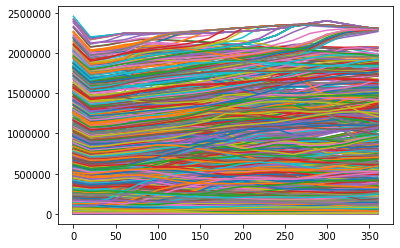

In [66]:
for i in range (0,963):
    plt.plot(trajs["particle_time"], trajs["particle_dens"][i],'-')

Generating [particle_eint] fields in trajectories: 100%|██████████| 231/231 [00:00<00:00, 375.20it/s]


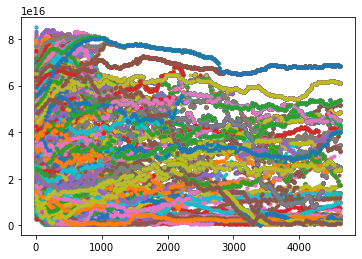

In [44]:
for i in range (0,963):
    plt.plot(trajs["particle_time"], trajs["particle_eint"][i],'.')

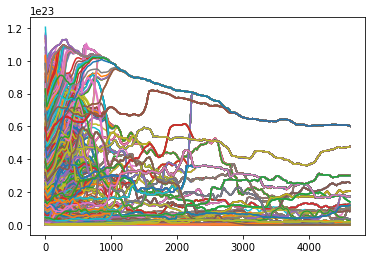

In [45]:
for i in range (0,963):
    plt.plot(trajs["particle_time"], trajs["particle_pres"][i],'-')

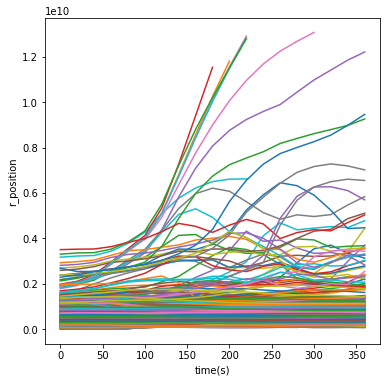

In [82]:
plt.figure(figsize=(6,6))
for i in range (0,963):
    plt.plot(trajs["particle_time"], trajs["particle_position_x"][i],'-')
plt.xlabel('time(s)')
plt.ylabel('r_position')
plt.savefig('r_position(cm)',dpi=200)

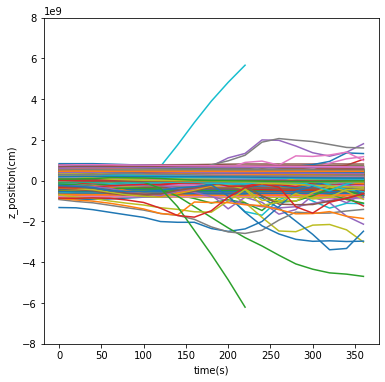

In [91]:
plt.figure(figsize=(6,6))
for i in range (0,963):
    plt.plot(trajs["particle_time"], trajs["particle_position_y"][i],'-')
plt.ylim(-8*10**9,8*10**9)
plt.xlabel('time(s)')
plt.ylabel('z_position(cm)')
plt.savefig('z_position',dpi=200)

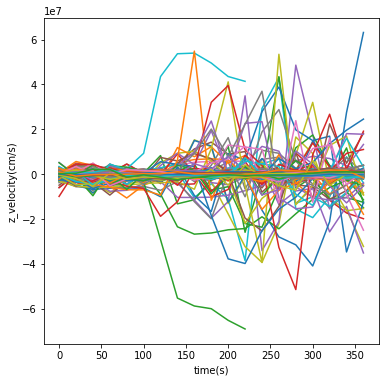

In [79]:
plt.figure(figsize=(6,6))
for i in range (0,963):
    plt.plot(trajs["particle_time"], trajs["particle_velocity_y"][i],'-')
plt.xlabel('time(s)')
plt.ylabel('z_velocity(cm/s)')
plt.savefig('z_velocity',dpi=200)

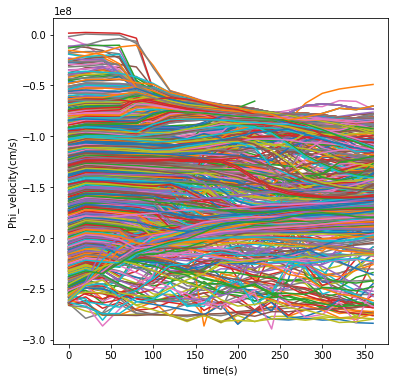

In [80]:
plt.figure(figsize=(6,6))
for i in range (0,963):
    plt.plot(trajs["particle_time"], trajs["particle_velocity_z"][i],'-')
plt.xlabel('time(s)')
plt.ylabel('Phi_velocity(cm/s)')
plt.savefig('Phi_velocity',dpi=200)

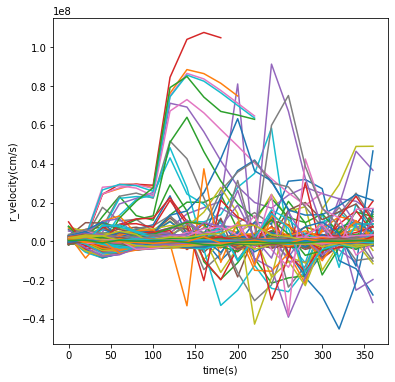

In [81]:
plt.figure(figsize=(6,6))
for i in range (0,963):
    plt.plot(trajs["particle_time"], trajs["particle_velocity_x"][i],'-')
plt.xlabel('time(s)')
plt.ylabel('r_velocity(cm/s)')
plt.savefig('r_velocity',dpi=200)